## LIBRARY

In [155]:
import keras
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.models import Sequential

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

from keras.preprocessing.image import img_to_array, ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
from glob import glob

## PATH

In [156]:
train_path = "flowers/Train"
test_path = "flowers/Test"

## DATA AUGMENTATION

In [157]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  featurewise_center=True,
                                  featurewise_std_normalization=True,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
                                  train_path,
                                  target_size=(224,224),
                                  color_mode="rgb",
                                  class_mode="categorical")

test_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
                                  test_path,
                                  target_size=(224,224),
                                  color_mode="rgb",
                                  class_mode="categorical")



Found 4231 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


## NUMBER OF CLASS

In [158]:
className = glob(train_path +'/*')
numberOfClass=len(className)
print("Number Of Class: ", numberOfClass)

Number Of Class:  5


## MODEL

In [ ]:
# Keras Application --> ResNet50, ResNet152V2, VGG19, VGG16, Xception
application_model = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
application_model.trainable = False

model = Sequential()

model.add(application_model)
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation('softmax'))

## COMPILE

In [160]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## MODEL CHECKPOINT & EARLY STOPPING

In [161]:
model_checkpoint = ModelCheckpoint(
    filepath='flowers_application.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

## FIT

In [162]:
batch_size = 32
epochs = 20

hist = model.fit_generator(generator=train_generator,
                           steps_per_epoch = 4240 // batch_size,
                           epochs = epochs,
                           verbose = 1,
                           callbacks =[model_checkpoint],
                           validation_data = test_generator)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
132/132 [==============================] - 62s 473ms/step - loss: 1.6997 - accuracy: 0.4513 - val_loss: 0.9450 - val_accuracy: 0.7500
Epoch 2/20
132/132 [==============================] - 62s 472ms/step - loss: 1.0755 - accuracy: 0.5889 - val_loss: 0.8737 - val_accuracy: 0.6630
Epoch 3/20
132/132 [==============================] - 62s 471ms/step - loss: 0.9924 - accuracy: 0.6073 - val_loss: 0.7665 - val_accuracy: 0.7174
Epoch 4/20
132/132 [==============================] - 62s 469ms/step - loss: 0.9204 - accuracy: 0.6530 - val_loss: 0.6299 - val_accuracy: 0.7935
Epoch 5/20
132/132 [==============================] - 61s 462ms/step - loss: 0.9096 - accuracy: 0.6540 - val_loss: 0.6594 - val_accuracy: 0.7717
Epoch 6/20
132/132 [==============================] - 62s 471ms/step - loss: 0.8809 - accuracy: 0.6563 - val_loss: 0.6570 - val_accuracy: 0.7609
Epoch 7/20
132/132 [==============================] - 64s 485ms/step - loss: 0.8581 - accuracy: 0.6706 - val_loss: 0.6288 - val_ac

## MODEL SAVE

In [163]:
model.save('flowers_applications_fit.h5')

## VISUALIZATION

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


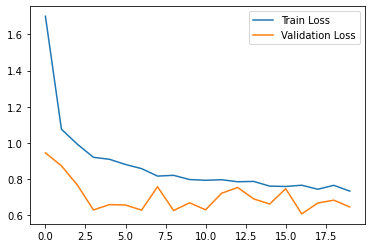

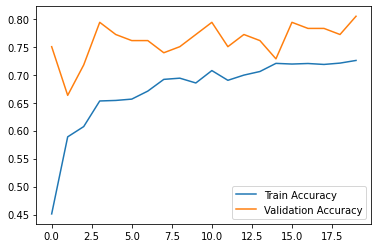

In [166]:
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

plt.figure()

plt.plot(hist.history["accuracy"], label="Train Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()